In [1]:
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm

In [50]:
df_4 = pd.read_csv('http://www.esdc.gc.ca/ouvert-open/labour-travail/leep/2019/Form4.csv', encoding = "ISO-8859-1")
df_4["GEOGRAPHY"].unique()


array(['National', 'Provincial', 'CMA'], dtype=object)

In [52]:
df_4 = df_4.fillna(0)

df_4.drop(df_4.loc[df_4['GEOGRAPHY'].isin(["National","CMA"]) ].index, inplace=True)
df_4 = df_4.loc[df_4["OCCGROUP"] ==  "Overall"]
df_41 = df_4.groupby("LOCATION").sum()
df_41["%Women"] = df_41["ALLWOMENCOUNT"]/df_41["ALLCOUNT"]*100
df_41["%Aboriginal"] = df_41["ABORIGALLCOUNT"]/df_41["ALLCOUNT"]*100
df_41["%PWD"] = df_41["PWDALLCOUNT"]/df_41["ALLCOUNT"]*100
df_41["%Minorities"] = df_41["VISMINALLCOUNT"]/df_41["ALLCOUNT"]*100
df_41

,CALENDARYEAR,NAICSID,NAICSCLASSTITLE,ALLCOUNT,ALLMENCOUNT,ALLWOMENCOUNT,ABORIGALLCOUNT,ABORIGMENCOUNT,ABORIGWOMENCOUNT,PWDALLCOUNT,PWDMENCOUNT,PWDWOMENCOUNT,VISMINALLCOUNT,VISMINMENCOUNT,VISMINWOMENCOUNT,%Women,%Aboriginal,%PWD,%Minorities
LOCATION,,,,,,,,,,,,,,,,,,,
Alberta,361401,0.0,0,15162,10074.0,5088.0,430.0,277.0,153.0,359.0,212.0,147.0,3727.0,2495.0,1232.0,33.557578,2.836037,2.367762,24.581190
British Columbia,361401,0.0,0,17031,11348.0,5683.0,556.0,350.0,206.0,409.0,241.0,168.0,5308.0,3655.0,1653.0,33.368563,3.264635,2.401503,31.166696
Manitoba,224109,0.0,0,4771,3491.0,1280.0,438.0,331.0,107.0,134.0,90.0,44.0,1264.0,946.0,318.0,26.828757,9.180465,2.808636,26.493398
New Brunswick,113064,0.0,0,3228,1849.0,1379.0,80.0,33.0,47.0,162.0,67.0,95.0,502.0,294.0,208.0,42.719950,2.478315,5.018587,15.551425
Newfoundland and Labrador,88836,0.0,0,819,474.0,345.0,73.0,39.0,34.0,26.0,14.0,12.0,82.0,51.0,31.0,42.124542,8.913309,3.174603,10.012210
Northwest Territories,14133,0.0,0,98,69.0,29.0,9.0,4.0,5.0,4.0,3.0,1.0,27.0,19.0,8.0,29.591837,9.183673,4.081633,27.551020
Nova Scotia,133254,0.0,0,2351,1419.0,932.0,59.0,24.0,35.0,82.0,45.0,37.0,409.0,277.0,132.0,39.642705,2.509570,3.487877,17.396852
Nunavut,12114,0.0,0,179,131.0,48.0,59.0,42.0,17.0,3.0,2.0,1.0,22.0,13.0,9.0,26.815642,32.960894,1.675978,12.290503
Ontario,862113,0.0,0,64104,39958.0,24146.0,987.0,620.0,367.0,1665.0,912.0,753.0,19996.0,12509.0,7487.0,37.666916,1.539686,2.597342,31.193061


In [58]:
df_4final = df_41[["%Women","%Aboriginal","%PWD","%Minorities"]]
df_4final.sort_values(by=["%Minorities"], ascending = False)

,%Women,%Aboriginal,%PWD,%Minorities
LOCATION,,,,
Ontario,37.666916,1.539686,2.597342,31.193061
British Columbia,33.368563,3.264635,2.401503,31.166696
Northwest Territories,29.591837,9.183673,4.081633,27.551020
Manitoba,26.828757,9.180465,2.808636,26.493398
Alberta,33.557578,2.836037,2.367762,24.581190
Québec,32.797450,1.141466,1.456827,20.878895
Nova Scotia,39.642705,2.509570,3.487877,17.396852
Saskatchewan,31.611650,6.951456,2.873786,17.009709
New Brunswick,42.719950,2.478315,5.018587,15.551425


Pct Women: 1:Yukon 44%
            2:New Brunswick 42.7
            Last: Nunavut 26.8
            Notible: Ontario 37.66(largest)
PCT Aboriginal 1:Nunavut 32.96
                2:Yukon 11.4
                3: Northwest Territories 29.59
                Notible: Ontario: 1.5
pct PWD: 1:New Brunswick 5%
            2: Yukon 4.57
            Notible: Ontario 2.59(ranked 9th out of 13 provinces and territories)
pct Minorities: 1: Ontario 31.19
                2: BC 31.16
                3:Northwest: 27.55
                last: prince edward island 5.6
            
       

Text(0.5, 1.0, 'Percentage of workers in different provinces, demographically')

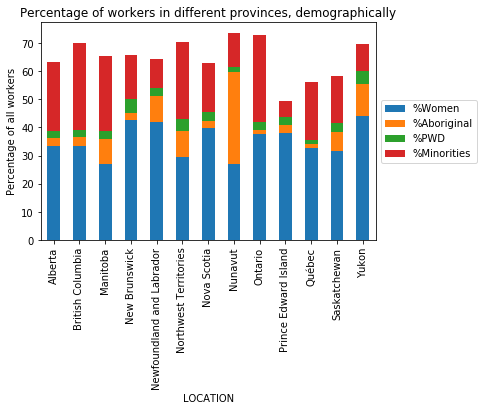

In [53]:
df_4final.plot.bar(stacked = True,).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percentage of all workers")
plt.title("Percentage of workers in different provinces, demographically")

Text(0, 0.5, 'Percentage of all workers')

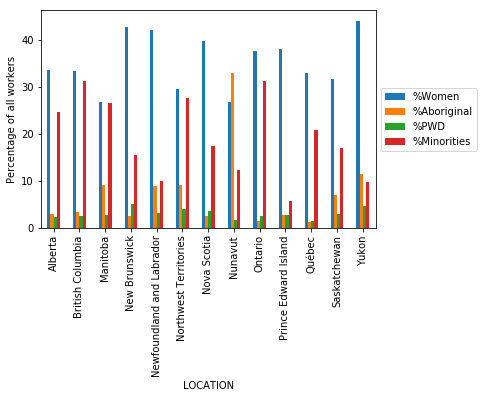

In [44]:
df_4final.plot.bar(stacked = False,).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Percentage of all workers")